In [4]:
import os
import logging
import warnings
import time
import numpy as np
import mxnet as mx
import mxnet.gluon as gluon
from mxnet import autograd
from mxnet.test_utils import download_model
import gluoncv as gcv
from gluoncv.model_zoo import get_model
from mxnet.contrib import amp

amp.init()

In [8]:
with mx.Context(mx.gpu(0)):
    # Below is an example of converting a gluon hybrid block to a mixed precision block
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("ignore")
        model = get_model("resnet50_v1")
        model.collect_params().initialize(ctx=mx.current_context())
        model.hybridize()
        model(mx.nd.zeros((1, 3, 224, 224)))
        converted_model = amp.convert_hybrid_block(model)
        result = converted_model.forward(mx.nd.random.uniform(shape=(1, 3, 224, 224),
                                                              dtype=np.float32))

In [10]:
result


[[-6.13281250e-01 -6.84814453e-02 -5.56152344e-01 -4.61669922e-01
   3.24096680e-02 -6.46972656e-02 -2.76855469e-01  1.78680420e-02
   1.99707031e-01 -8.53027344e-01  8.24218750e-01 -9.82421875e-01
  -9.96704102e-02 -1.24218750e+00  6.44042969e-01 -9.23461914e-02
  -2.84118652e-02  9.52148438e-01 -1.76391602e-01 -1.98730469e-01
  -1.13525391e-01  1.69555664e-01  1.80816650e-02  3.56689453e-01
  -3.76464844e-01  9.88769531e-01  5.75866699e-02 -8.72070312e-01
  -8.07128906e-01 -8.91113281e-03 -4.10888672e-01 -8.81958008e-02
   6.58569336e-02 -7.56835938e-01 -6.80664062e-01 -5.49011230e-02
   4.54345703e-01  8.55102539e-02  2.14721680e-01  5.76660156e-01
  -3.35205078e-01 -3.02581787e-02  3.98925781e-01 -1.74560547e-01
   8.38867188e-01  5.11718750e-01 -2.55889893e-02  9.20410156e-02
   1.20483398e-01  7.21679688e-01  7.12890625e-02 -7.24609375e-01
  -1.35009766e-01  1.25195312e+00 -9.24072266e-02  3.86230469e-01
   8.57543945e-02  2.40722656e-01  4.88281250e-01 -7.41210938e-01
   1.3232

In [1]:
from insightface.app.face_analysis import FaceAnalysis

In [2]:
fa = FaceAnalysis(det_name='retinaface_r50_v1',
                  rec_name='arcface_r100_v1',
                  ga_name='genderage_v1')
fa.prepare(ctx_id=0)

/home/tk/.insightface/models/retinaface_r50_v1/R50 0


MXNetError: Traceback (most recent call last):
  File "../include/mxnet/operator.h", line 228
MXNetError: Check failed: in_type->at(i) == mshadow: :default_type_flag || in_type->at(i) == -1: Unsupported data type 2

In [6]:
import mxnet as mx
from mxnet.contrib import amp

amp.init()
with mx.Context(mx.gpu(0)):
    prefix = '/home/tk/.insightface/models/retinaface_r50_v1/R50'
    epoch = 0
    sym, arg_params, aux_params = mx.model.load_checkpoint(prefix, epoch)

#     prefix, epoch = mx.test_utils.download_model("imagenet1k-resnet-18", dst_dir='./')
#     sym, arg_params, aux_params = mx.model.load_checkpoint(prefix, epoch)
    result_sym, result_arg_params, result_aux_params = amp.convert_model(sym,
                                                                         arg_params,
                                                                         aux_params)

MXNetError: Traceback (most recent call last):
  File "../include/mxnet/operator.h", line 228
MXNetError: Check failed: in_type->at(i) == mshadow: :default_type_flag || in_type->at(i) == -1: Unsupported data type 2

In [7]:
sym, arg_params, aux_params

(<Symbol group [face_rpn_cls_prob_reshape_stride32, face_rpn_bbox_pred_stride32, face_rpn_landmark_pred_stride32, face_rpn_cls_prob_reshape_stride16, face_rpn_bbox_pred_stride16, face_rpn_landmark_pred_stride16, face_rpn_cls_prob_reshape_stride8, face_rpn_bbox_pred_stride8, face_rpn_landmark_pred_stride8]>,
 {'ssh_m2_det_context_conv3_2_bn_gamma': 
  [0.15870735 0.16518177 0.15984538 0.16155659 0.16799073 0.17600557
   0.16571839 0.16647312 0.16649236 0.17036204 0.15772909 0.1558782
   0.1606201  0.15906833 0.16821489 0.17243753 0.17103148 0.1669757
   0.16501993 0.16208152 0.1679454  0.16520178 0.17566067 0.16281874
   0.16469455 0.16754662 0.1671794  0.15805624 0.16853137 0.16214572
   0.16920008 0.16600277 0.16730142 0.16892609 0.16077271 0.15465869
   0.16045444 0.1812243  0.16416842 0.15389936 0.1649883  0.1574999
   0.169023   0.17109299 0.16553959 0.1599522  0.17489259 0.15724327
   0.15968445 0.16337775 0.16352922 0.1523981  0.1619128  0.16421545
   0.1690444  0.16683173 0.1639

In [5]:
sym, arg_params, aux_params

(<Symbol softmax>,
 {'stage1_unit1_sc_weight': 
  [[[[-2.54024845e-02]]
  
    [[-8.13880097e-03]]
  
    [[ 3.06496553e-08]]
  
    ...
  
    [[ 3.39002796e-02]]
  
    [[ 4.64950638e-08]]
  
    [[-1.07117450e+00]]]
  
  
   [[[ 2.36952707e-01]]
  
    [[ 9.15847942e-02]]
  
    [[-3.79132388e-08]]
  
    ...
  
    [[ 8.21769461e-02]]
  
    [[-1.08259016e-07]]
  
    [[ 5.18906601e-02]]]
  
  
   [[[-1.20711543e-01]]
  
    [[ 4.48240228e-02]]
  
    [[-6.14419904e-10]]
  
    ...
  
    [[-3.25510390e-02]]
  
    [[-3.93029396e-08]]
  
    [[ 8.13762546e-02]]]
  
  
   ...
  
  
   [[[-8.43847394e-02]]
  
    [[ 4.70841788e-02]]
  
    [[-3.05352543e-08]]
  
    ...
  
    [[ 2.41243336e-02]]
  
    [[ 4.37778240e-08]]
  
    [[ 5.24443388e-02]]]
  
  
   [[[-3.03647310e-01]]
  
    [[-5.06540481e-03]]
  
    [[-5.14177856e-08]]
  
    ...
  
    [[-1.97126698e-02]]
  
    [[-8.56667293e-10]]
  
    [[ 6.97427019e-02]]]
  
  
   [[[ 4.03510541e-01]]
  
    [[-3.98481637e-02]]
  


In [5]:
model = get_model('retinaface_r50_v1')

In [8]:
model.prepare(ctx_id=0)

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


In [10]:
import mxnet as mx

In [11]:
from mxnet.contrib import amp

amp.init()

In [14]:
prefix, epoch = mx.test_utils.download_model("imagenet1k-resnet-18", dst_dir='./')
sym, arg_params, aux_params = mx.model.load_checkpoint(prefix, epoch)

In [22]:
aux_params

{'bn_data_moving_var': 
 [4926.5615 4650.2334 5043.49  ]
 <NDArray 3 @cpu(0)>,
 'stage1_unit1_bn1_moving_var': 
 [1.6859552e-03 1.8090849e-03 5.6051939e-45 2.5045332e-03 8.4102963e-04
  3.3672731e-03 1.4804822e-03 5.0309572e-02 2.5317422e-03 5.6051939e-45
  1.7418478e-03 2.5466401e-03 5.6051939e-45 5.6051939e-45 2.5500178e-03
  2.2193156e-03 5.4071535e-04 1.1871064e-03 2.3516305e-03 5.6051939e-45
  5.8223563e-04 2.0890725e-03 2.6407801e-03 1.7038269e-03 2.3036476e-03
  1.7493606e-03 2.6130730e-03 5.6051939e-45 2.2898470e-03 5.6051939e-45
  1.5143002e-03 2.7547297e-03 5.6051939e-45 1.5921729e-03 5.7902595e-04
  5.6051939e-45 5.6051939e-45 5.6051939e-45 2.3265742e-03 5.6051939e-45
  7.8353827e-04 5.6051939e-45 2.2781892e-03 2.2669155e-03 1.0564007e-03
  5.6051939e-45 4.3797646e-02 5.6051939e-45 2.6513713e-03 5.6051939e-45
  1.3178083e-03 1.8192495e-03 1.9831415e-03 4.4378191e-02 2.4077974e-03
  2.0330655e-03 1.9110517e-03 5.6051939e-45 2.8563368e-03 5.6051939e-45
  2.6118724e-02 1.952671

In [12]:
amp.convert_model(model.model)

TypeError: convert_model() missing 2 required positional arguments: 'arg_params' and 'aux_params'

In [3]:
import os
import logging
import warnings
import time
import numpy as np
import mxnet as mx
import mxnet.gluon as gluon
from mxnet import autograd
from mxnet.test_utils import download_model
import gluoncv as gcv
from gluoncv.model_zoo import get_model

data_shape = 512
batch_size = 8
lr = 0.001
wd = 0.0005
momentum = 0.9

# training contexts
ctx = [mx.gpu(0)]

# set up logger
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

ce_metric = mx.metric.Loss('CrossEntropy')
smoothl1_metric = mx.metric.Loss('SmoothL1')

ModuleNotFoundError: No module named 'gluoncv'

In [16]:
import pickle
from PIL import Image, ImageDraw

img = Image.open('./data/Tae.mp4.00240.jpg')
fa = pickle.load(open('./data/Tae.mp4.00240.jpg.face-analysis.pkl', 'rb'))

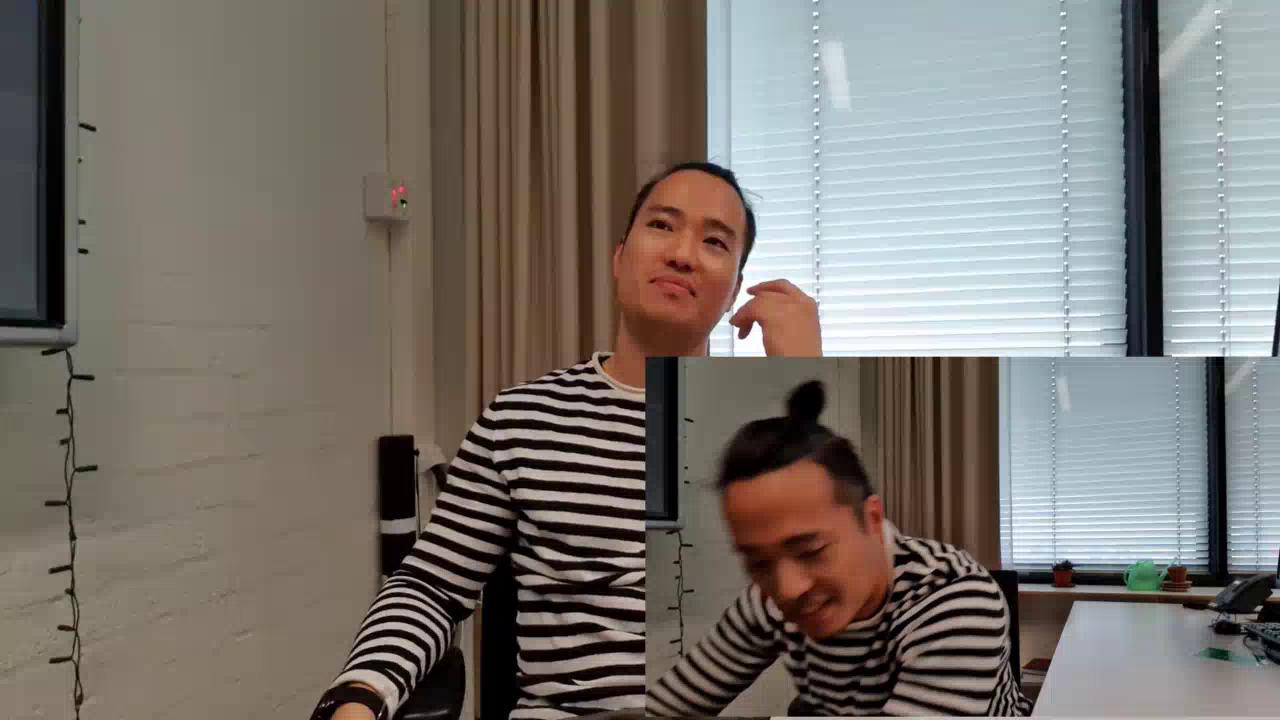

In [9]:
img

In [20]:
draw = ImageDraw.Draw(img)
# for 
# draw.line((0, 0) + img.size, fill=128)
# draw.line((0, img.size[1], img.size[0], 0), fill=128)

In [21]:
draw

In [37]:
for fa_ in fa:
    draw.rectangle(fa_['bbox'].tolist())
    # print(fa_['landmark'])

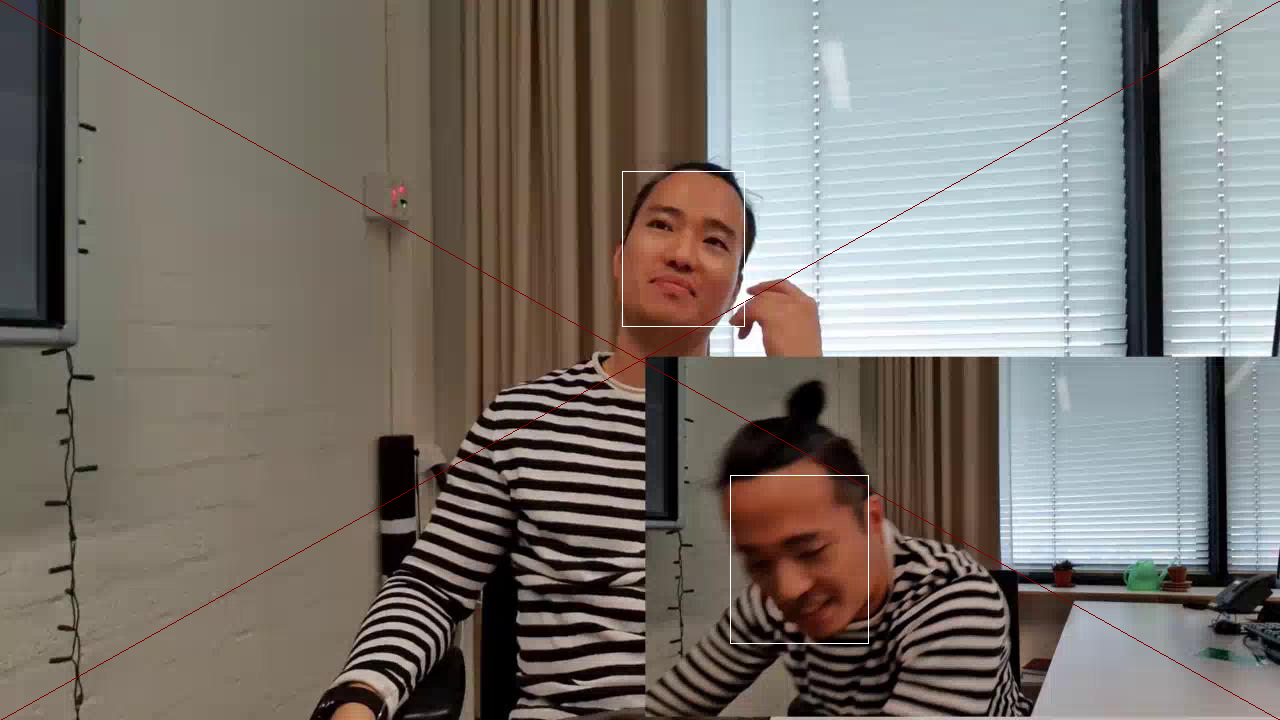

In [38]:
img

In [35]:
fa_['bbox'].tolist()


[730.5728149414062, 475.69451904296875, 868.5324096679688, 643.4891967773438]

In [1]:
import requests
import jsonpickle
url = 'http://127.0.0.1:10001/extract-frames'
files = {'video': open('data/Tae.mp4', 'rb')}
data = {'fps_max':5, 'width_max':1280, 'height_max': 720}
response = requests.post(url, files=files, data=data)
response = jsonpickle.decode(response.text)

frames = response['frames']
metadata = response['metadata']

In [2]:
metadata

{'num_frames_original': 555,
 'num_frames': 47,
 'duration_seconds': 9.25,
 'fps_original': 60.0,
 'fps': 5.081081081081081,
 'width_original': 1280,
 'height_original': 720,
 'width': 1280,
 'height': 720,
 'frame_idx_original': [0,
  12,
  24,
  36,
  48,
  60,
  72,
  84,
  96,
  108,
  120,
  132,
  144,
  156,
  168,
  180,
  192,
  204,
  216,
  228,
  240,
  252,
  264,
  276,
  288,
  300,
  312,
  324,
  336,
  348,
  360,
  372,
  384,
  396,
  408,
  420,
  432,
  444,
  456,
  468,
  480,
  492,
  504,
  516,
  528,
  540,
  552]}

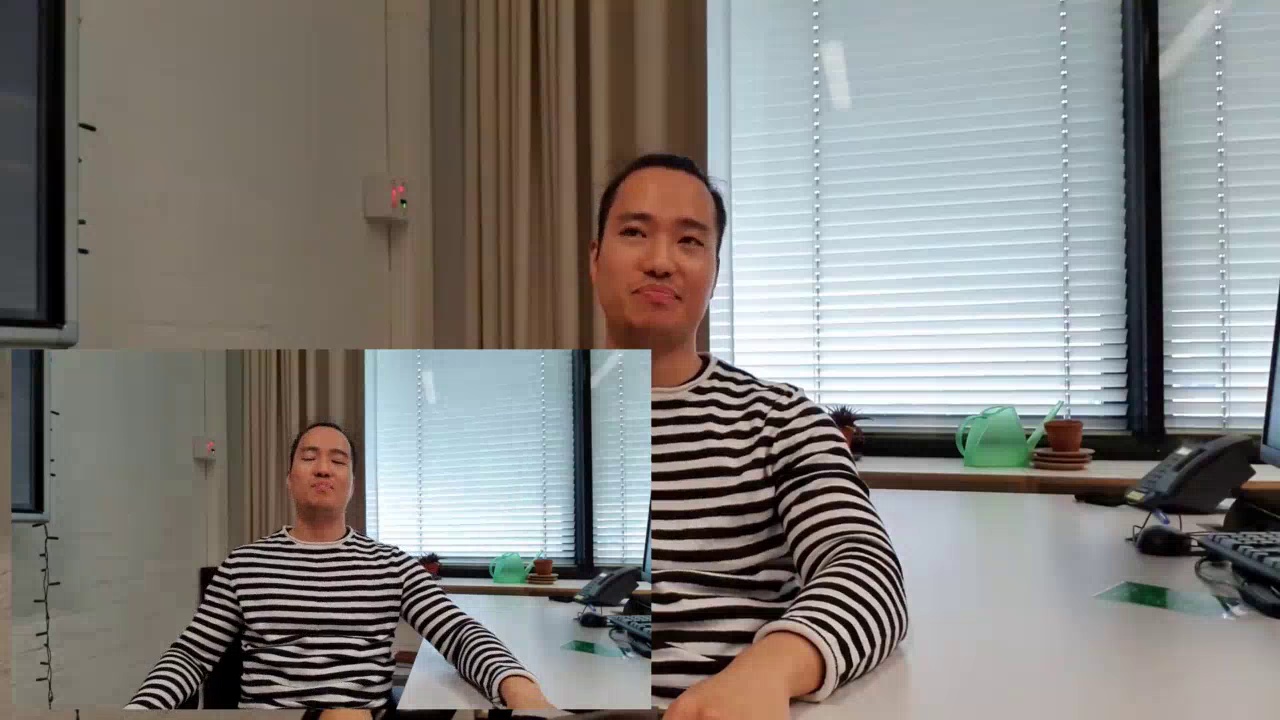

In [3]:
frames[1]

In [5]:
import requests
import jsonpickle
url = 'http://127.0.0.1:10002/face-analysis'
files = {'image': jsonpickle.encode(frames[1])}
response = requests.post(url, files=files)
response = jsonpickle.decode(response.text)

fa_results = response['fa_results']

In [6]:
fa_results

[{'age': 23,
  'bbox': array([599.04290771, 168.01036072, 716.91986084, 332.6882019 ]),
  'det_score': 0.9991993308067322,
  'gender': 1,
  'landmark': array([[633.0057 , 234.63095],
         [690.223  , 242.12045],
         [659.24   , 266.32904],
         [632.28375, 292.02307],
         [677.62604, 298.10236]], dtype=float32),
  'normed_embedding': array([-1.15012657e-03,  4.88912836e-02,  6.62300270e-04,  9.95205417e-02,
          5.20521142e-02,  4.53721955e-02,  2.65403520e-02, -1.56194381e-02,
          2.80309673e-02, -1.31601527e-01,  1.12223485e-02,  1.43146673e-02,
         -5.81634566e-02, -2.39320528e-02,  8.29192623e-02, -4.51936834e-02,
         -4.53782181e-04,  2.74875760e-02, -3.66056599e-02, -8.37722719e-02,
          5.24326861e-02,  5.58305793e-02, -1.70931742e-02,  1.64571498e-02,
         -1.41777378e-03, -1.79934315e-02, -4.02520709e-02,  3.78596522e-02,
          7.84256011e-02, -3.25768418e-03, -3.89989763e-02, -6.26995042e-02,
          8.02305341e-02,  3.222

In [17]:
import pickle

with open('foo.pkl', 'wb') as stream:
    pickle.dump(fa_results, stream)

In [18]:
import pickle

with open('foo.pkl', 'rb') as stream:
    foo = pickle.load(stream)

In [19]:
foo

[{'age': 23,
  'bbox': array([599.04290771, 168.01036072, 716.91986084, 332.6882019 ]),
  'det_score': 0.9991993308067322,
  'gender': 1,
  'landmark': array([[633.0057 , 234.63095],
         [690.223  , 242.12045],
         [659.24   , 266.32904],
         [632.28375, 292.02307],
         [677.62604, 298.10236]], dtype=float32),
  'normed_embedding': array([-1.15012657e-03,  4.88912836e-02,  6.62300270e-04,  9.95205417e-02,
          5.20521142e-02,  4.53721955e-02,  2.65403520e-02, -1.56194381e-02,
          2.80309673e-02, -1.31601527e-01,  1.12223485e-02,  1.43146673e-02,
         -5.81634566e-02, -2.39320528e-02,  8.29192623e-02, -4.51936834e-02,
         -4.53782181e-04,  2.74875760e-02, -3.66056599e-02, -8.37722719e-02,
          5.24326861e-02,  5.58305793e-02, -1.70931742e-02,  1.64571498e-02,
         -1.41777378e-03, -1.79934315e-02, -4.02520709e-02,  3.78596522e-02,
          7.84256011e-02, -3.25768418e-03, -3.89989763e-02, -6.26995042e-02,
          8.02305341e-02,  3.222

In [43]:
from insightface.app.face_analysis import FaceAnalysis

In [44]:
fa = FaceAnalysis(det_name='retinaface_r50_v1',
                    rec_name='arcface_r100_v1',
                    ga_name='genderage_v1')

In [45]:
fa.prepare(ctx_id=-1)

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


In [64]:
results_video = []
for frame in frames:
    frame = np.array(frame)
    list_of_features = fa.get(frame)
    
    results_frame = []
    for features in list_of_features:
        feature_dict = {'age': features.age,
                        'bbox': features.bbox,
                        'det_score': features.det_score,
                        'gender': features.gender,
                        'landmark': features.landmark,
                        'normed_embedding': features.normed_embedding
                        }
        results_frame.append(feature_dict)

    results_video.append(results_frame)

In [67]:
for foo in results_video:
    print(len(foo))

2
2
2
1
2
1
1
2
2
2


In [73]:
foo[0].keys()

dict_keys(['age', 'bbox', 'det_score', 'gender', 'landmark', 'normed_embedding'])

In [71]:
foo[0]['age']

21

In [72]:
foo[0]['gender']

1

In [60]:
len(frames)

10

In [62]:
metadata['frame_idx_original']

[0, 60, 120, 180, 240, 300, 360, 420, 480, 540]